Youtube Data EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

FILE_PATH = 'youtube_data.csv'
df = pd.read_csv(FILE_PATH)

print(f"Data loaded successfully from: {FILE_PATH}")
print(f"Total records: {len(df)}")


Data loaded successfully from: youtube_data.csv
Total records: 1500


In [43]:
print("\n--- DataFrame Info (Aggregated Data) ---")
df.info()

# Convert the 'Date' column to datetime objects
# This step is critical for time-series plotting
df['Date'] = pd.to_datetime(df['Date'])

print("\n'Date' column converted to datetime.")
print(df.dtypes)


--- DataFrame Info (Aggregated Data) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          1500 non-null   object 
 1   title             1500 non-null   object 
 2   description       769 non-null    object 
 3   tags              435 non-null    object 
 4   Date              1500 non-null   object 
 5   view_count        1500 non-null   int64  
 6   like_count        1500 non-null   int64  
 7   comment_count     1500 non-null   int64  
 8   duration_iso      1500 non-null   object 
 9   scrape_date       1500 non-null   object 
 10  search_query      1500 non-null   object 
 11  duration_seconds  1500 non-null   float64
 12  engagement_rate   1500 non-null   float64
 13  age_days          1500 non-null   float64
 14  video_type        1500 non-null   object 
 15  title_length      1500 non-null   int64  
 16  

In [31]:
df.head()

,video_id,title,description,tags,Date,view_count,like_count,comment_count,duration_iso,scrape_date,search_query,duration_seconds,engagement_rate,age_days,video_type,title_length,Trend_ID
0,Ou2yy8WJZYM,"Viral Tomato & Feta Pasta, My way! 💁‍♀️ #Dinne...",This is my second most viral video with over 2...,NaN,2025-01-29,22127015,1273389,16745,PT2M44S,2025-10-16 22:50:48.507996+00:00,feta pasta,164.0,0.058306,260.413559,Longer_Video,80,feta-pasta
1,vm7FE008wXE,this is the best pasta ever 😩,NaN,NaN,2022-02-26,9935117,647603,7016,PT1M,2025-10-16 22:50:48.508024+00:00,feta pasta,60.0,0.065889,1328.186152,Longer_Video,29,feta-pasta
2,OhElQbL28dM,My family hates my feta pasta recipe | MyHealt...,NaN,NaN,2022-05-20,8662634,350583,2056,PT35S,2025-10-16 22:50:48.508031+00:00,feta pasta,35.0,0.040708,1245.855515,Short,52,feta-pasta
3,LVoix3f10bg,Viral Baked Feta Pasta 2 Years Later | FeelGoo...,NaN,NaN,2023-01-04,7670358,357193,1485,PT24S,2025-10-16 22:50:48.508035+00:00,feta pasta,24.0,0.046762,1016.841372,Short,53,feta-pasta
4,wp75SQqB-NU,Vegan Feta Cheese Pasta 🧀 🍅🍝😋 #shorts #Feta #p...,NaN,NaN,2022-12-24,6296481,0,514,PT44S,2025-10-16 22:50:48.508039+00:00,feta pasta,44.0,0.000082,1027.757761,Short,96,feta-pasta


In [33]:
print(f"Current rows (Video-Level Data): {len(df)}")

# Define aggregation logic for key numerical columns
#agg_funcs = {
    'video_id': 'count',                 # Count of videos published that day
    'view_count': 'sum',                 # Total views from videos published that day
    'like_count': 'sum',                 # Total likes from videos published that day
    'comment_count': 'sum',              # Total comments from videos published that day
    'engagement_rate': 'mean',           # Average engagement rate for that day's videos
    'duration_seconds': 'mean',          # Average duration for that day's videos
    'title_length': 'mean'               # Average title length for that day's videos
}

# Group by the standardized Trend_ID and Date of Publication
#df_agg = df.groupby(['Trend_ID', 'Date']).agg(agg_funcs).reset_index()

# Rename the count column to the expected name
#df_agg.rename(columns={'video_id': 'daily_video_count'}, inplace=True)

# Replace the original DataFrame 'df' with the new aggregated one
#df = df_agg

#print(f"Aggregation complete. New rows (Daily Time-Series): {len(df)}")

# Re-check the columns to confirm the fix
#print("\nNew DataFrame Columns (Should include daily_video_count):")
#print(df.columns)

Current rows (Video-Level Data): 1500
Aggregation complete. New rows (Daily Time-Series): 1013

New DataFrame Columns (Should include daily_video_count):
Index(['Trend_ID', 'Date', 'daily_video_count', 'view_count', 'like_count', 'comment_count', 'engagement_rate', 'duration_seconds', 'title_length'], dtype='object')


In [45]:
# Summary statistics for numerical columns
print("--- Summary Statistics for Aggregated Metrics ---")
# The statistics now represent daily sums/averages (e.g., the max 'daily_video_count' is the peak day).
print(df.describe().T)

# Check the unique trends to ensure all four are present and standardized
print("\n--- Unique Food Trends (Trend_ID) ---")
print(df['Trend_ID'].unique())
print(f"Total unique trends: {df['Trend_ID'].nunique()}")

--- Summary Statistics for Aggregated Metrics ---
                   count                        mean                  min                  25%                  50%                  75%                  max              std
Date                1500  2024-07-03 21:58:04.800000  2015-01-06 00:00:00  2024-01-18 06:00:00  2025-02-28 12:00:00  2025-07-15 00:00:00  2025-10-16 00:00:00              NaN
view_count        1500.0              4723834.773333                447.0              29187.5             360695.0            3452733.5          387041778.0  17578554.316918
like_count        1500.0                  114293.734                  0.0                441.5               5825.0              82335.5            8529828.0    379182.938165
comment_count     1500.0                     703.464                  0.0                 11.0                 80.0                527.5              32977.0       2038.35649
duration_seconds  1500.0                   52.175333                  6.0  

In [47]:
print(df.columns)

Index(['video_id', 'title', 'description', 'tags', 'Date', 'view_count', 'like_count', 'comment_count', 'duration_iso', 'scrape_date', 'search_query', 'duration_seconds', 'engagement_rate', 'age_days', 'video_type', 'title_length', 'Trend_ID'], dtype='object')


<Figure size 1500x600 with 0 Axes>

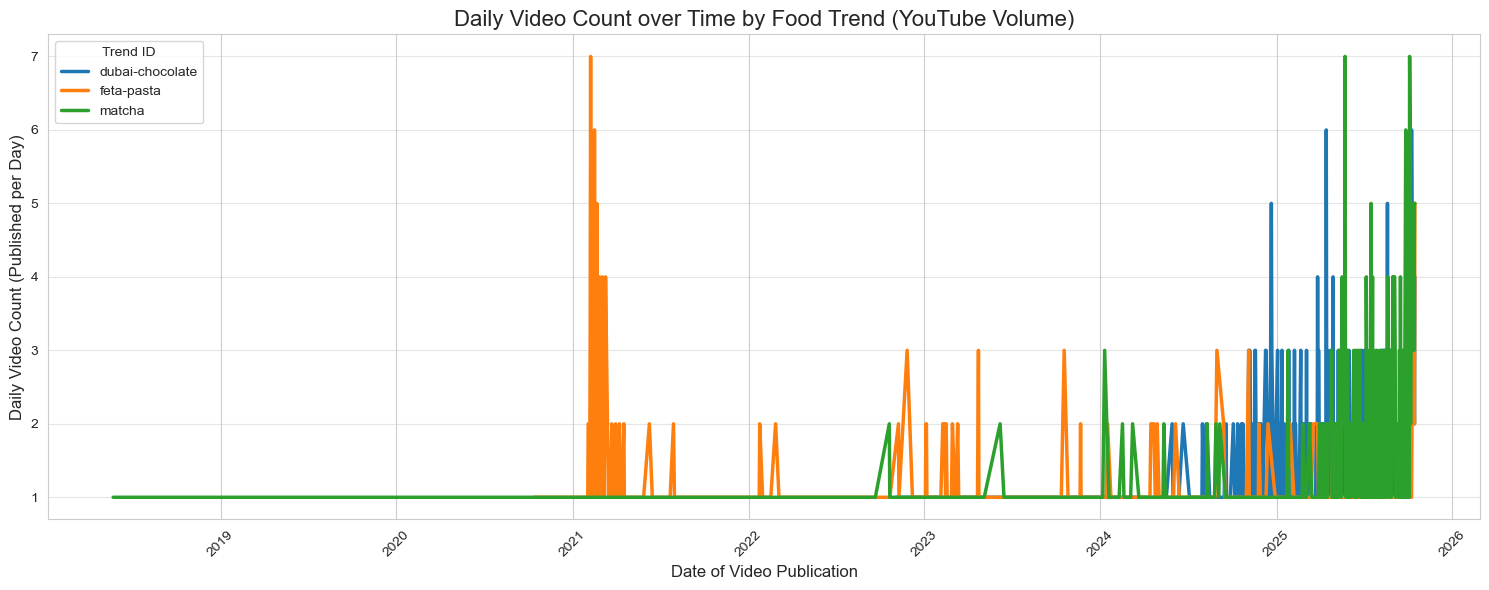

In [19]:
# Set a visual style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Plot the daily video count for each trend
# This shows the velocity of content creation for each trend over time.
sns.lineplot(data=df, x='Date', y='daily_video_count', hue='Trend_ID', linewidth=2.5)

plt.title('Daily Video Count over Time by Food Trend (YouTube Volume)', fontsize=16)
plt.xlabel('Date of Video Publication', fontsize=12)
plt.ylabel('Daily Video Count (Published per Day)', fontsize=12)
plt.legend(title='Trend ID')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

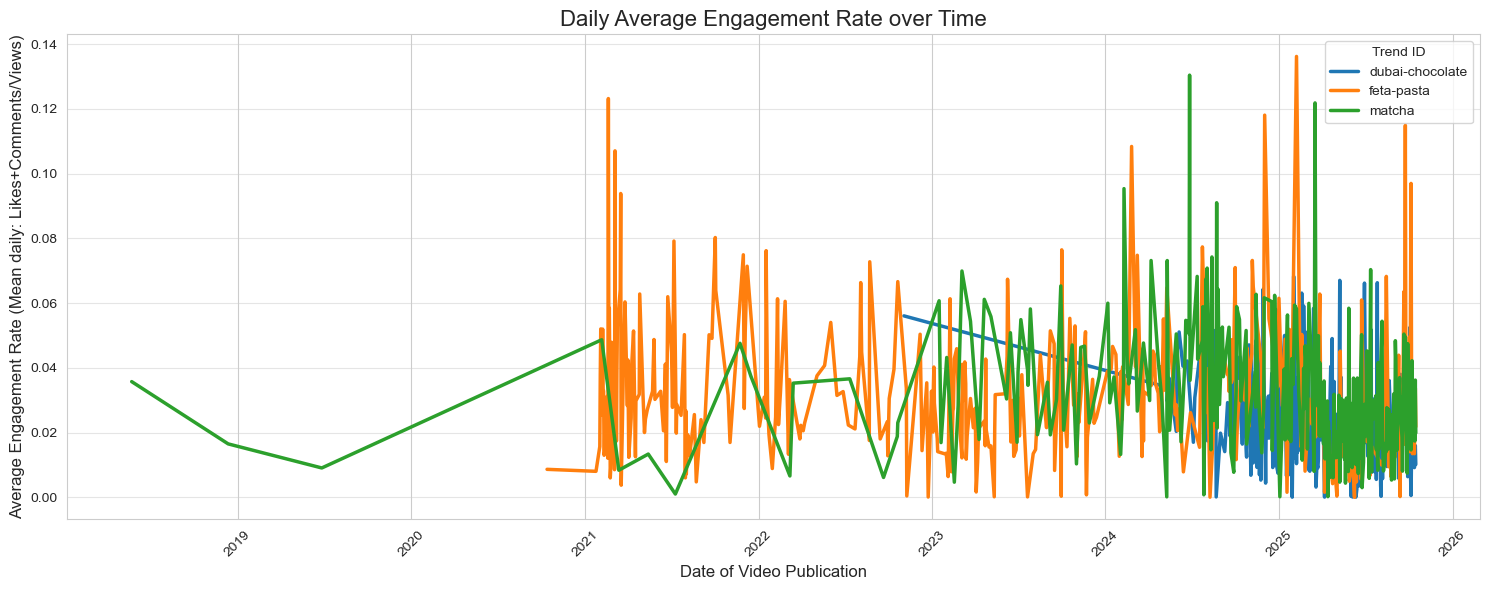

In [21]:
# Plot the average daily engagement rate over time
plt.figure(figsize=(15, 6))

sns.lineplot(data=df, x='Date', y='engagement_rate', hue='Trend_ID', linewidth=2.5)

plt.title('Daily Average Engagement Rate over Time', fontsize=16)
plt.xlabel('Date of Video Publication', fontsize=12)
plt.ylabel('Average Engagement Rate (Mean daily: Likes+Comments/Views)', fontsize=12)
plt.legend(title='Trend ID')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

--- Total Unique Videos Collected per Search Query (Trend ID) ---
          Trend_ID  total_videos
0  dubai-chocolate           500
1       feta-pasta           500
2           matcha           500


C:\Users\zumre\AppData\Local\Temp\ipykernel_25056\1058010379.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_volume_by_trend, x='Trend_ID', y='total_videos', palette='Spectral')


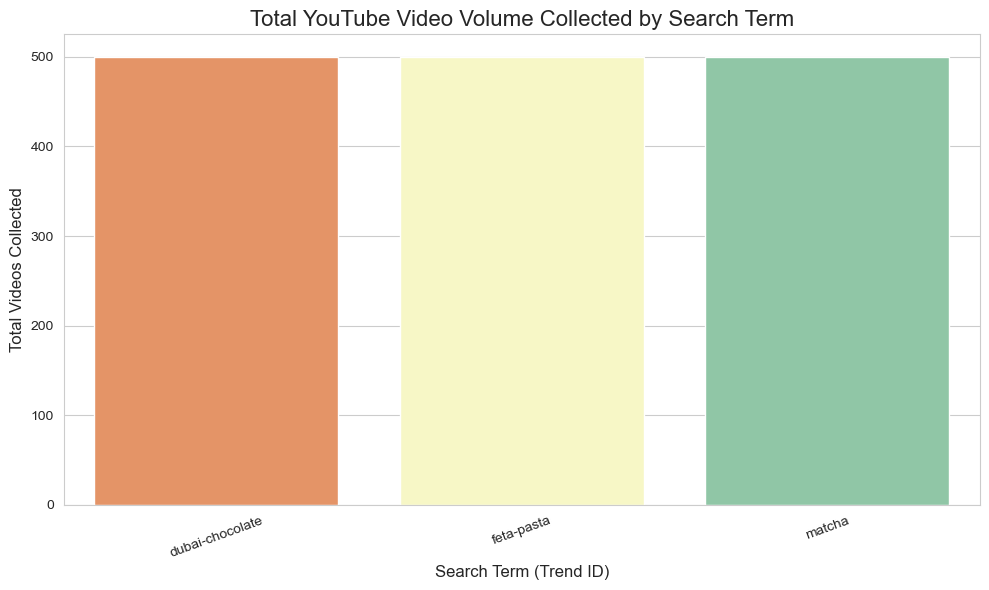

In [23]:
#Calculate Total Video Volume per Trend ---

# Group by Trend_ID and calculate the total number of videos collected
video_volume_by_trend = df.groupby('Trend_ID').agg(
    total_videos=('daily_video_count', 'sum')
).reset_index().sort_values(by='total_videos', ascending=False)

print("--- Total Unique Videos Collected per Search Query (Trend ID) ---")
print(video_volume_by_trend)


# --- 2. Visualize Total Video Volume ---

plt.figure(figsize=(10, 6))
# Use the calculated total_videos column
sns.barplot(data=video_volume_by_trend, x='Trend_ID', y='total_videos', palette='Spectral')

plt.title('Total YouTube Video Volume Collected by Search Term', fontsize=16)
plt.xlabel('Search Term (Trend ID)', fontsize=12)
plt.ylabel('Total Videos Collected', fontsize=12)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()